In [1]:
import networkx as nx
import numpy as np
import itertools 

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [2]:
def kplaplacian_mtf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [3]:
import networkx as nx
import numpy as np
import itertools 

def kplaplacian(G,k):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        d = nx.shortest_path_length(G, source=n[0], target=n[1])
        if d==k:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        #else:
            #L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

[ -2.22044605e-16+0.j   8.29913513e-01+0.j   4.48119430e+00+0.j
   2.68889218e+00+0.j   2.00000000e+00+0.j]
[ -2.22044605e-16+0.j   9.76807758e-01+0.j   4.49598521e+00+0.j
   2.79836037e+00+0.j   2.14936121e+00+0.j]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


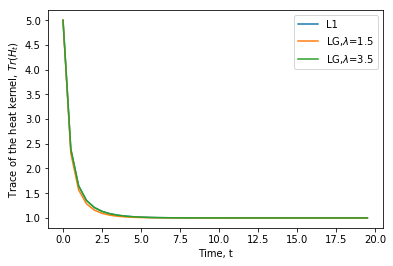

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_ltf(G,1.5))
l3 = eigvals(kplaplacian_ltf(G,3))
print(l1)
print(l2)
time = np.arange(0,20,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='LG,$\lambda$=1.5')
plt.plot(time,T3, label='LG,$\lambda$=3.5')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


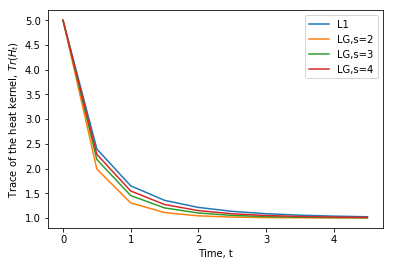

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_mtf(G,2))
l3 = eigvals(kplaplacian_mtf(G,3))
l4 = eigvals(kplaplacian_mtf(G,4))
l5 = eigvals(kplaplacian_mtf(G,5))
#print(l1)
#print(l2)
#print(l3)
#print(l4)
#print(l5)
time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='LG,s=2')
plt.plot(time,T3, label='LG,s=3')
plt.plot(time,T4, label='LG,s=4')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

In [15]:
print(l2)
print(l3)
print(l4)
print(l5)

[ -4.44089210e-16+0.j   1.64988707e+00+0.j   3.24836101e+00+0.j
   4.57397414e+00+0.j   2.75000000e+00+0.j]
[ -2.22044605e-16+0.j   1.21185082e+00+0.j   4.52167767e+00+0.j
   2.96554559e+00+0.j   2.37500000e+00+0.j]
[  2.22044605e-16+0.j   1.01165184e+00+0.j   4.49939708e+00+0.j
   2.82614244e+00+0.j   2.18750000e+00+0.j]
[  2.22044605e-16+0.j   9.17711938e-01+0.j   4.48961282e+00+0.j
   2.75715569e+00+0.j   2.09375000e+00+0.j]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


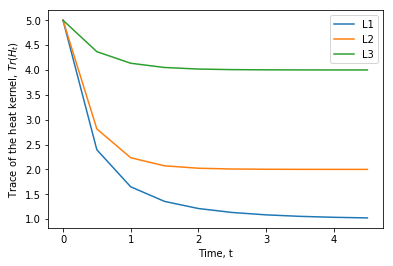

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])
l1 = eigvals(kplaplacian(G,1))
l2 = eigvals(kplaplacian(G,2))
l3 = eigvals(kplaplacian(G,3))
#print(l1)
#print(l2)
#print(l3)
#print(l4)
#print(l5)
time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='L2')
plt.plot(time,T3, label='L3')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


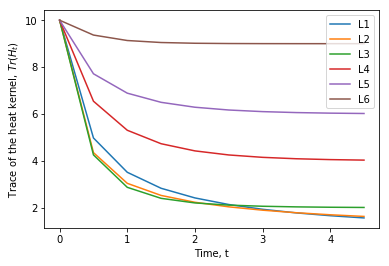

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian(G,2))
l3 = eigvals(kplaplacian(G,3))
l4 = eigvals(kplaplacian(G,4))
l5 = eigvals(kplaplacian(G,5))
l6 = eigvals(kplaplacian(G,6))
#print(l1)
#print(l2)
#print(l3)
#print(l4)
#print(l5)
time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
T5 =[]
T6 =[]
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))
    T5.append(np.sum(np.exp(-t*(l5))))
    T6.append(np.sum(np.exp(-t*(l6))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='L2')
plt.plot(time,T3, label='L3')
plt.plot(time,T4, label='L4')
plt.plot(time,T5, label='L5')
plt.plot(time,T6, label='L6')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


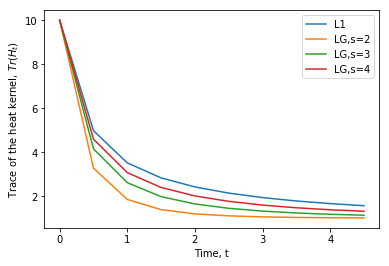

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_mtf(G,2))
l3 = eigvals(kplaplacian_mtf(G,3))
l4 = eigvals(kplaplacian_mtf(G,4))
l5 = eigvals(kplaplacian_mtf(G,5))
#print(l1)
#print(l2)
#print(l3)
#print(l4)
#print(l5)
time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='LG,s=2')
plt.plot(time,T3, label='LG,s=3')
plt.plot(time,T4, label='LG,s=4')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

In [22]:
print(sorted(l2)[0])
print(sorted(l3)[0])
print(sorted(l4)[0])
print(sorted(l5)[0])

(4.4408920985e-16+0j)
(1.02378772031e-15+0j)
(9.12588959348e-17+0j)
(-1.78801645081e-15+0j)


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


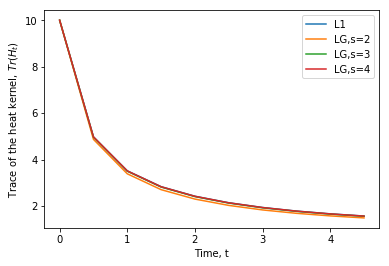

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_ltf(G,2))
l3 = eigvals(kplaplacian_ltf(G,3))
l4 = eigvals(kplaplacian_ltf(G,4))
l5 = eigvals(kplaplacian_ltf(G,5))
#print(l1)
#print(l2)
#print(l3)
#print(l4)
#print(l5)
time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='LG,s=2')
plt.plot(time,T3, label='LG,s=3')
plt.plot(time,T4, label='LG,s=4')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


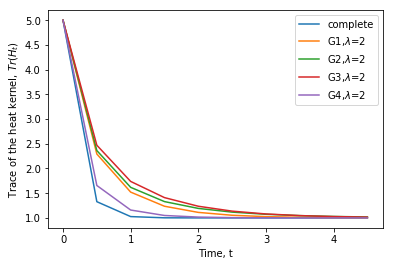

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.complete_graph(5)
G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(1,3),(3,5)])
G4 = nx.Graph([(1,2),(1,5),(5,4),(2,4),(2,3),(3,4),(1,4),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_ltf(G1,2))
l3 = eigvals(kplaplacian_ltf(G2,2))
l4 = eigvals(kplaplacian_ltf(G3,2))
l5 = eigvals(kplaplacian_ltf(G4,2))

time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
T5 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))
    T5.append(np.sum(np.exp(-t*(l5))))

plt.plot(time,T1, label='complete')
plt.plot(time,T2, label='G1,$\lambda$=2')
plt.plot(time,T3, label='G2,$\lambda$=2')
plt.plot(time,T4, label='G3,$\lambda$=2')
plt.plot(time,T5, label='G4,$\lambda$=2')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


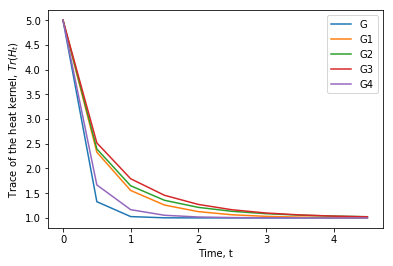

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.complete_graph(5)
G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(1,3),(3,5)])
G4 = nx.Graph([(1,2),(1,5),(5,4),(2,4),(2,3),(3,4),(1,4),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(nx.laplacian_matrix(G1).todense())
l3 = eigvals(nx.laplacian_matrix(G2).todense())
l4 = eigvals(nx.laplacian_matrix(G3).todense())
l5 = eigvals(nx.laplacian_matrix(G4).todense())

time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
T5 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))
    T5.append(np.sum(np.exp(-t*(l5))))

plt.plot(time,T1, label='G')
plt.plot(time,T2, label='G1')
plt.plot(time,T3, label='G2')
plt.plot(time,T4, label='G3')
plt.plot(time,T5, label='G4')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


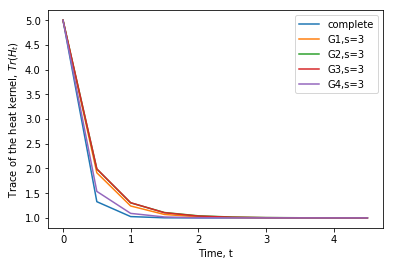

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.complete_graph(5)
G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(1,3),(3,5)])
G4 = nx.Graph([(1,2),(1,5),(5,4),(2,4),(2,3),(3,4),(1,4),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_mtf(G1,2))
l3 = eigvals(kplaplacian_mtf(G2,2))
l4 = eigvals(kplaplacian_mtf(G3,2))
l5 = eigvals(kplaplacian_mtf(G4,2))

time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
T5 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))
    T5.append(np.sum(np.exp(-t*(l5))))

plt.plot(time,T1, label='complete')
plt.plot(time,T2, label='G1,s=3')
plt.plot(time,T3, label='G2,s=3')
plt.plot(time,T4, label='G3,s=3')
plt.plot(time,T5, label='G4,s=3')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


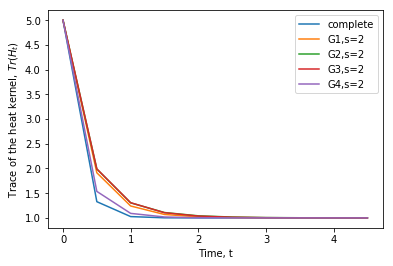

In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.complete_graph(5)
G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(1,3),(3,5)])
G4 = nx.Graph([(1,2),(1,5),(5,4),(2,4),(2,3),(3,4),(1,4),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_mtf(G1,2))
l3 = eigvals(kplaplacian_mtf(G2,2))
l4 = eigvals(kplaplacian_mtf(G3,2))
l5 = eigvals(kplaplacian_mtf(G4,2))

time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
T5 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))
    T5.append(np.sum(np.exp(-t*(l5))))

plt.plot(time,T1, label='complete')
plt.plot(time,T2, label='G1,s=2')
plt.plot(time,T3, label='G2,s=2')
plt.plot(time,T4, label='G3,s=2')
plt.plot(time,T5, label='G4,s=2')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()